# Clone Repository from Bitbucket For Our Traffic Signs Dataset

In [45]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


# Load Libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import random
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pickle
import pandas as pd

In [47]:
np.random.seed(0)

# Importing Our Data

In [48]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f) #loads the pickle files into train_data
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f) #loads the pickle files into val_data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f) #loads the pickle files into test-data

print(type(train_data)) #print data type to know the kind of file we are working with

x_train, y_train = train_data['features'], train_data['labels']
x_val, y_val = val_data['features'], val_data['labels']
x_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [49]:
#print the shape of the data we are working with
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [50]:
 #verify that our dataset was imported correctly
assert(x_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to the number of labels'
assert(x_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels'
assert(x_val.shape[0] == y_val.shape[0]), 'The number of images is not equal to the number of labels'
assert(x_train.shape[1:] == (32, 32, 3)), 'The dimensions of the images are not 32 by 32'
assert(x_test.shape[1:] == (32, 32, 3)), 'The dimensions of the images are not 32 by 32'
assert(x_val.shape[1:] == (32, 32, 3)), 'The dimensions of the images are not 32 by 32'

# Visualize Our Data

In [51]:
data = pd.read_csv('german-traffic-signs/signnames.csv') #load the sign names data

In [52]:
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

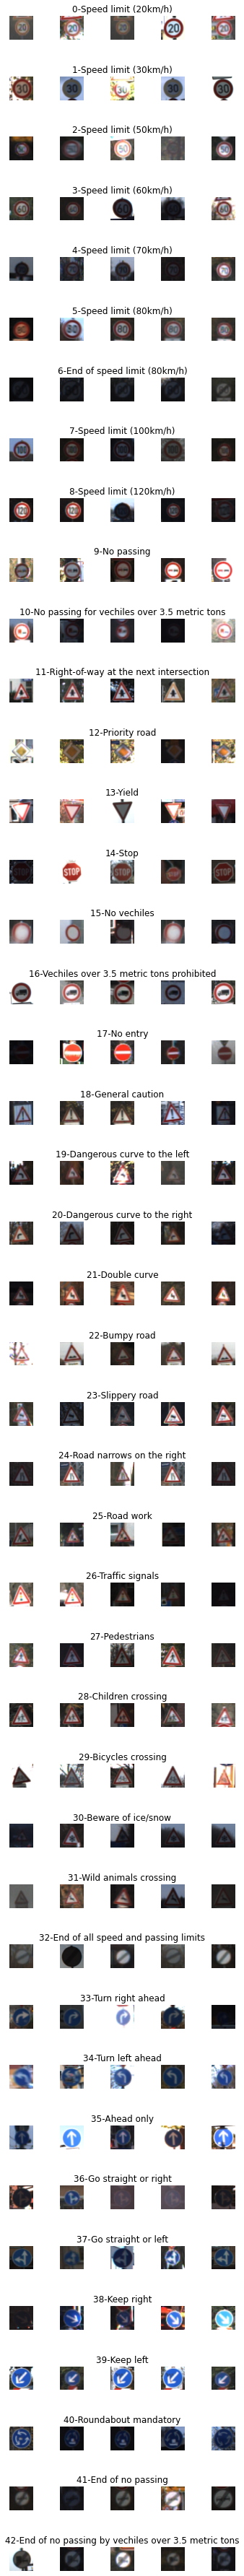

In [53]:
num_of_samples = [] #number of samples we are working with

cols = 5
num_classes = 43 #number of classes we are working with

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows(): #this itterates over our entire dataframe rows as index and series pairs(row is the place holder variable)
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected) - 1)), :, :], cmap = plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'number of images')

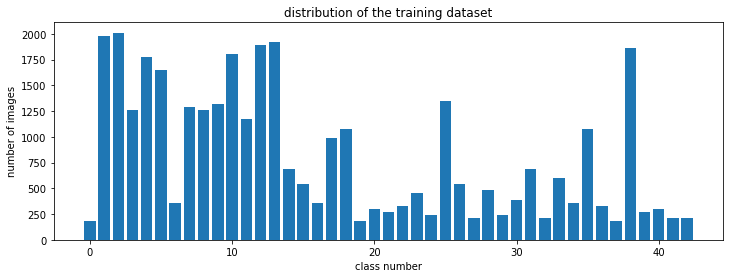

In [54]:
#summarize how many training images we have for each 
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title('distribution of the training dataset')
plt.xlabel('class number')
plt.ylabel('number of images')

# Data Preprocessing

(32, 32, 3)
36


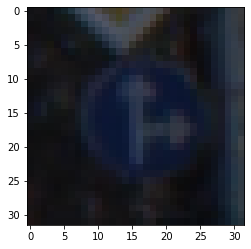

In [55]:
import cv2

plt.imshow(x_train[1000]) #show a random image from our training data
print(x_train[1000].shape)
print(y_train[1000]) #prints the label

In [56]:
#convert to grayscale
def grayscale(img):
    img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(x_train[1000]) #converts our image into grayscale and stores it in img variable

(32, 32)


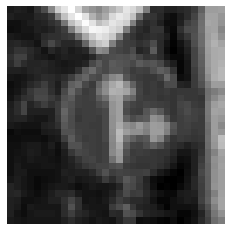

In [57]:
plt.axis('off')
print(img.shape)
plt.imshow(img, cmap = plt.get_cmap('gray'))

(32, 32)


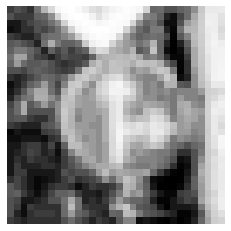

In [58]:
#histogram equalization: this helps to standardize the lighting condition on all our images

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.axis('off')
print(img.shape)

In [59]:
#aplly all these to all our images
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255 #normailze all our images
    return img

#update each item in the array
x_train = np.array(list(map(preprocessing, x_train)))
x_test = np.array(list(map(preprocessing, x_test)))
x_val = np.array(list(map(preprocessing, x_val)))


(34799, 32, 32)


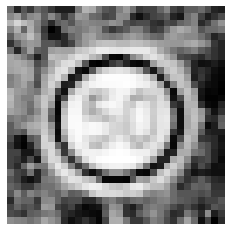

In [60]:
plt.imshow(x_train[random.randint(0, len(x_train) - 1)], cmap = plt.get_cmap('gray'))
plt.axis('off')
print(x_train.shape)

In [61]:
x_train = x_train.reshape(34799, 32, 32, 1) #reshape our data to have a depth of 1 color channel 
x_test = x_test.reshape(12630, 32, 32, 1) #reshape our data to have a depth of 1 color channel 
x_val = x_val.reshape(4410, 32, 32, 1) #reshape our data to have a depth of 1 color channel 


# Data Augmentation: To repopulate our data so we can have sufficent data for all classes

In [62]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range = 0.1,
                  height_shift_range = 0.1,
                  zoom_range = 0.2,
                  shear_range = 0.1,
                  rotation_range = 10)
datagen.fit(x_train)

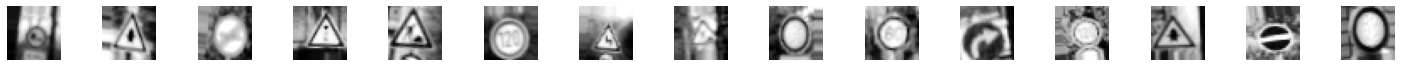

In [63]:
batches = datagen.flow(x_train, y_train, batch_size = 20) #generate new images with this specific batch size
x_batch, y_batch = next(batches)

#plot the new generated images
fig, axs = plt.subplots(1, 15, figsize = (20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(x_batch[i].reshape(32, 32), cmap = plt.get_cmap('gray'))
    axs[i].axis('off')


In [64]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [65]:
#One hot encode our data labels

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

# Model Architecture

In [66]:
#define our model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
    model.add(Conv2D(60, (5, 5), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Conv2D(30, (3, 3), activation = 'relu'))
    model.add(Conv2D(30, (3, 3), activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    #model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
    

In [67]:
model = leNet_model()
print(model.summary()) #print our model summary

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 480)              

In [68]:
#fit our data generator into our model for our augmented data
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 50), steps_per_epoch = 2000, epochs = 10, validation_data = (x_val, y_val), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 1044s 522ms/step - loss: 0.8836 - accuracy: 0.7429 - val_loss: 0.0827 - val_accuracy: 0.9753
Epoch 2/10
2000/2000 [==============================] - 1071s 536ms/step - loss: 0.2115 - accuracy: 0.9342 - val_loss: 0.0589 - val_accuracy: 0.9841
Epoch 3/10
2000/2000 [==============================] - 1043s 522ms/step - loss: 0.1440 - accuracy: 0.9545 - val_loss: 0.0508 - val_accuracy: 0.9891
Epoch 4/10
2000/2000 [==============================] - 966s 483ms/step - loss: 0.1096 - accuracy: 0.9663 - val_loss: 0.0570 - val_accuracy: 0.9841
Epoch 5/10
2000/2000 [==============================] - 964s 482ms/step - loss: 0.0935 - accuracy: 0.9718 - val_loss: 0.0370 - val_accuracy: 0.9905
Epoch 6/10
2000/2000 [==============================] - 964s 482ms/step - loss: 0.0833 - accuracy: 0.9745 - val_loss: 0.0441 - val_accuracy: 0.9882
Epoch 7/10
2000/2000 [==============================] - 968s 484ms/step - loss: 0.0737 - accuracy: 0.9774 - v

Text(0.5, 0, 'epoch')

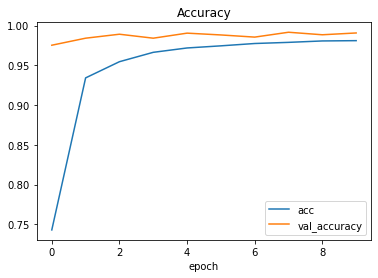

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

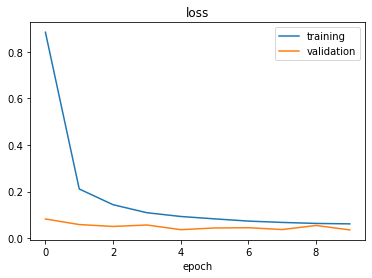

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

# Model Evaluation

In [71]:
score = model.evaluate(x_test, y_test, verbose = 0)

print('Test Score:', score[0])
print('Test Accuracy:', score[1])

Test Score: 0.10086008115990473
Test Accuracy: 0.9769596457481384


# Testing our model on images from the internet

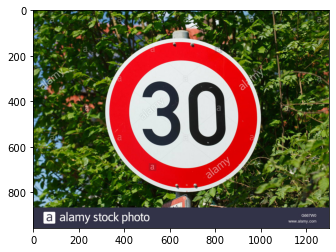

In [73]:
#fetch image
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


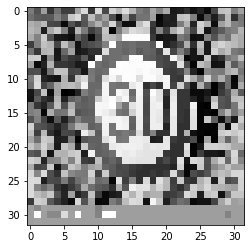

In [74]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [75]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

In [76]:
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [1]
